In [1]:
import numpy as np
from scipy.fft import fft2, ifft2, ifftshift, fftshift, ifft, fft 
import matplotlib.pyplot as plt

from classicalfield import FiniteTempGPE as gpe

In [2]:
g = gpe(winMult = 2, vortex = False, numImagSteps=500)

No vortices to be spawned
Total Imag Time:  49.73196578025818


In [3]:
num = 500
ksamples = np.zeros((num, len(g.ki[0][0]), len(g.ki[0][0])), dtype = np.complex_)

for i in range(num): 
    ksamples[i] = g.genPsiK()
 
average_result = np.mean(np.abs(ksamples)**2, axis = 0, dtype = np.complex_)
print(average_result.shape)

(1024, 1024)


C:\Users\TQC User\AppData\Roaming\Python\Python38\site-packages\matplotlib\cbook\__init__.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


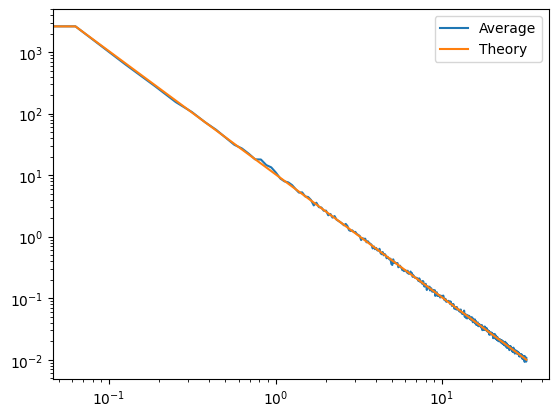

In [4]:
plt.figure() 
# for i in range(num): 
#     plt.plot(ifftshift(g.ki[0][0]), ifftshift(np.abs(ksamples[i][0]**2)))

# exclude the k = 0 mode from this 
plt.plot(ifftshift(g.ki[0][0][1:]), ifftshift(average_result[0][1:]), label = 'Average')
plt.yscale('log')
plt.xscale('log')
plt.plot(ifftshift(g.ki[0][0][1:]), ifftshift(2*g.T/g.ki[0][0][1:]**2), label = 'Theory')
plt.legend() 

Before Propagation

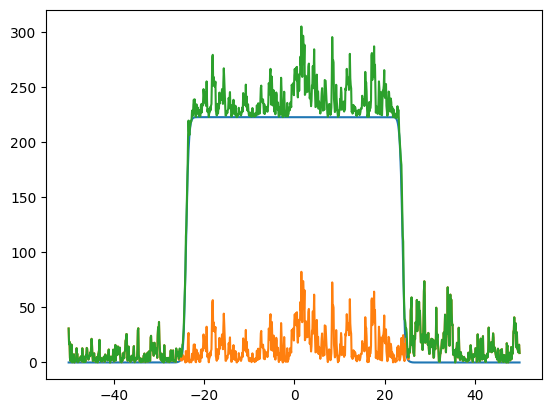

In [164]:
## Position Space 

coef=g.winL/g.dx**2
psik_sp = coef * (ksamples[0])

psix = ifft2(psik_sp)
## ground state 
plt.figure() 
plt.plot(g.xi[0][0], np.abs(g.gs)[len(g.gs)//2]**2)
plt.plot(g.xi[0][0], np.abs(psix)[0]**2)
plt.plot(g.xi[0][0], np.abs(psix)[0]**2 + np.abs(g.gs)[len(g.gs)//2]**2)
#plt.plot(g.xi[0][0], fftshift(np.abs(ktox)[0]**2))
plt.show() 

xtok = fft(np.sqrt(np.abs(psix)[0]**2 + np.abs(g.gs)[len(g.gs)//2]**2))
xtok = fft2(psix + g.gs)


C:\Users\TQC User\AppData\Local\Temp\ipykernel_21356\3653214907.py:4: RuntimeWarning: divide by zero encountered in divide
  plt.plot(g.ki[0][0], 2*g.T/g.ki[0][0]**2, label = 'Theory')


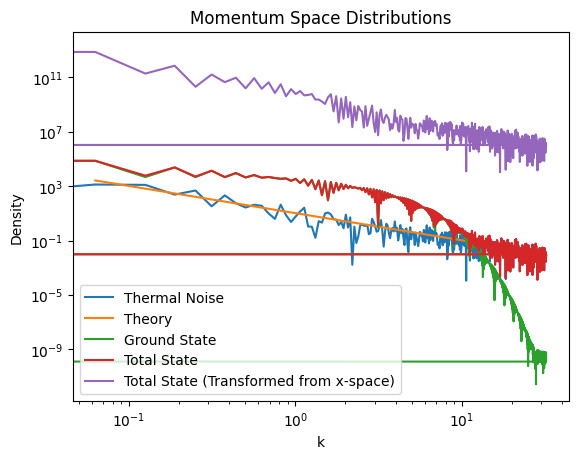

In [162]:
## Momentum Space
plt.figure() 
plt.plot(g.ki[0][0], np.abs(ksamples[0])[0]**2, label = "Thermal Noise")
plt.plot(g.ki[0][0], 2*g.T/g.ki[0][0]**2, label = 'Theory')

plt.plot(g.ki[0][0], np.abs(fft(np.abs(g.gs)[len(g.gs)//2]**2)), label="Ground State")
plt.plot(g.ki[0][0], np.abs(fft(np.abs(g.gs)[len(g.gs)//2]**2)) + np.abs(ksamples[0])[0]**2, label = 'Total State')
plt.plot(g.ki[0][0], np.abs(xtok)[0]**2, label = "Total State (Transformed from x-space)")
plt.yscale('log')
plt.xscale('log')
plt.legend() 
plt.title("Momentum Space Distributions")
plt.xlabel('k')
plt.ylabel('Density')
plt.show()

ktox = ifft2(np.sqrt(fft2(np.abs(g.gs)**2) + np.abs(coef*ksamples[0])**2))

C:\Users\TQC User\AppData\Local\Temp\ipykernel_21356\1669806230.py:4: RuntimeWarning: divide by zero encountered in divide
  plt.plot(g.ki[0][0], 2*g.T/g.ki[0][0]**2, label = 'Theory')


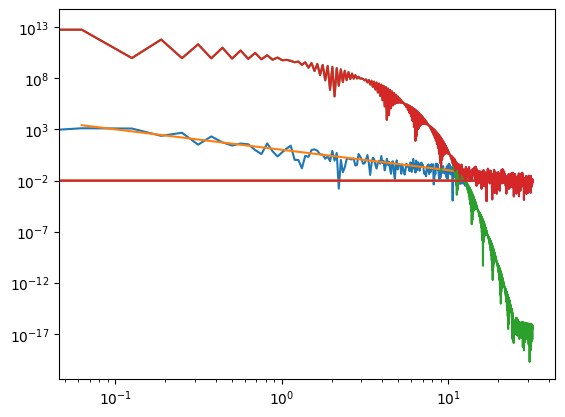

In [105]:
## Momentum Space: 2nd attempt 
plt.figure() 
plt.plot(g.ki[0][0], np.abs(ksamples[0])[0]**2)
plt.plot(g.ki[0][0], 2*g.T/g.ki[0][0]**2, label = 'Theory')
plt.plot(ifftshift(g.ki[0][0]), ifftshift(np.abs(fft2(g.gs))[0]**2), label = "Ground State")
plt.plot(g.ki[0][0], np.abs(ksamples[0])[0]**2+np.abs(fft2(g.gs))[0]**2)

plt.yscale('log')
plt.xscale('log')

Another attempt 

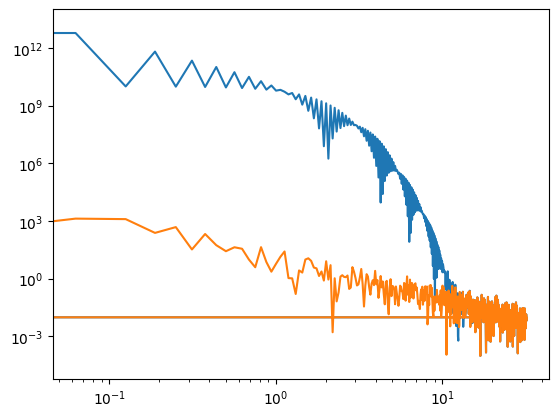

In [154]:
plt.figure() 
plt.plot(g.ki[0][0], np.abs(fft2(g.gs)+ksamples[0])[0]**2)  
plt.plot(g.ki[0][0], np.abs(ksamples[0])[0]**2)
plt.yscale('log')
plt.xscale('log')

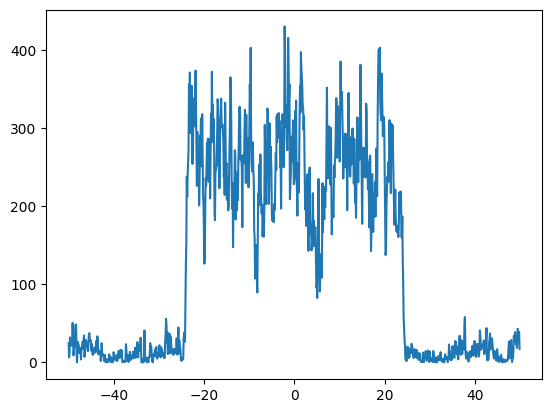

In [148]:
wavf = np.abs(ifft2(coef*ksamples[0])+g.gs)**2

plt.figure() 
plt.plot(g.xi[0][0], np.abs(ifft2(coef*ksamples[0])+g.gs)[len(g.gs)//2]**2)
plt.show() 

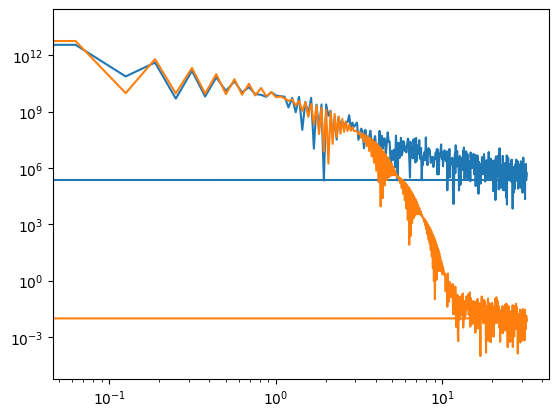

In [152]:
plt.figure() 
plt.plot(g.ki[0][0], np.abs(fft2(np.sqrt(wavf)))[0]**2)
plt.plot(g.ki[0][0], np.abs(fft2(g.gs)+ksamples[0])[0]**2)
plt.yscale('log')
plt.xscale('log')

Break

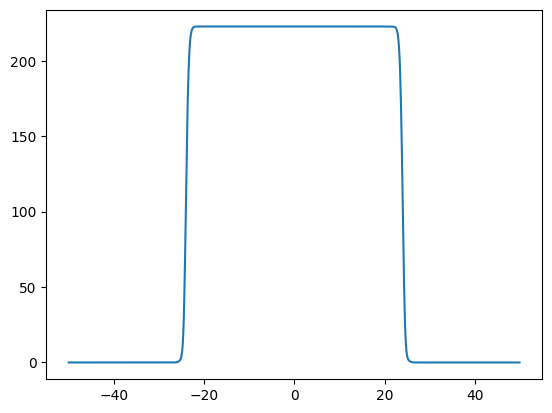

In [135]:
plt.figure() 
plt.plot(g.xi[0][0], np.abs(g.gs+ifft2(ksamples[0]))[len(g.gs)//2]**2)
plt.show() 

In [95]:
print(g.ki[0][0][0])

0.0


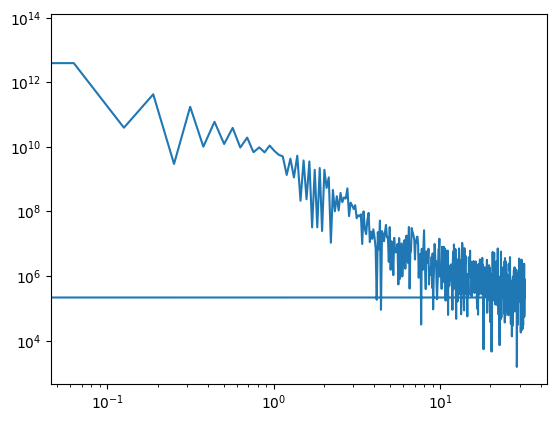

In [76]:
plt.figure() 

#plt.plot(ifft2(fft2(np.sqrt(np.abs(psix)**2 + np.abs(g.gs)**2)))[len(g.gs)//2])
plt.plot(g.ki[0][0], np.abs(fft2(np.sqrt(np.abs(psix)**2 + np.abs(g.gs)**2))[0])**2)

#plt.plot(np.sqrt(np.abs(psix)**2 + np.abs(g.gs)**2)[len(g.gs)//2])
# plt.plot(g.ki[0][0], np.abs(ksamples[0])[0]**2)
# plt.plot(g.ki[0][0], 2*g.T/g.ki[0][0]**2, label = 'Theory')
plt.yscale('log')
plt.xscale('log')


Fit the functions

In [57]:
from scipy.optimize import curve_fit

In [225]:
def fittingfunc(x, m, b): 
    return m*x+b

def cleandata(grid, noise): 
    mask = (grid > 0) & (noise > 0)

    grid_clean = grid[mask]
    noise_clean = noise[mask]

    return grid_clean, noise_clean

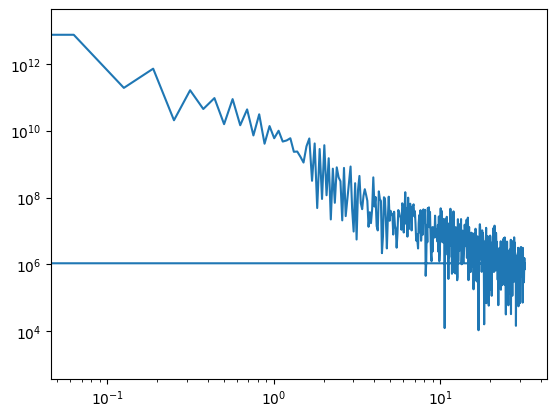

In [182]:
plt.plot(((np.abs(xtok[0])**2)))
plt.yscale('log')
plt.xscale('log')

In [188]:
print(np.shape([0]))

(1024,)


In [226]:
curve = np.abs(fft2(np.sqrt(np.abs(psix)**2 + np.abs(g.gs)**2))[0])**2
curve = np.abs(fft2(np.sqrt(np.abs(psix)**2 + np.abs(g.gs)**2))[0])**2

curve = xtok[0]


curve2 = np.abs(ksamples[0])[0]**2
grid = g.ki[0][0] 

clean_grid, clean_curve = cleandata(grid, curve)
clean_grid2, clean_curve2 = cleandata(grid, curve2)  

popt, pcov = curve_fit(fittingfunc, np.log(clean_grid), np.log(clean_curve))
popt2, pcov2 = curve_fit(fittingfunc, np.log(clean_grid2), np.log(clean_curve2))

print(popt)
print(popt2)

[-1.1890894  10.72204745]
[-2.03211925  1.93602112]


C:\Users\TQC User\AppData\Roaming\Python\Python38\site-packages\numpy\lib\function_base.py:626: ComplexWarning: Casting complex values to real discards the imaginary part
  a = asarray(a, dtype=dtype, order=order)


Try real time propagation

In [243]:
def realpropagate(dens, numSteps): 
    '''
    Note that the psi is now changed to the density so the abs**2 values are eliminated 
    The snapshots are now densities instead of wavefunctions 
    '''
    kinU = np.exp( -(1.0j )*(g.gpeobj.k2)*g.gpeobj.dt)
    
    snapshots = [dens] 
    dynpsiden = dens.copy() 

    for i in range(numSteps): 

        potU = np.exp(-(1.0j) *((g.gpeobj.Vbox)+g.gpeobj.g * dynpsiden-1)*g.gpeobj.dt)

        psiFTold = fft2(np.sqrt(dynpsiden))
        psiFTnew = psiFTold * kinU 
        psiinterim = ifft2(psiFTnew)
        psinew = potU * psiinterim 
            
        norm = np.sum(np.abs(psinew)**2) * g.dx**g.dim
        dynpsiden = g.gpeobj.Natoms/norm * np.abs(psinew)**2
            

        if (i%250 == 0):
            snapshots.append(dynpsiden)

    snapshots = np.array(snapshots)


    return snapshots, dynpsiden


In [244]:
# set up input wavefunction

thermal_wf = np.abs(psix)**2 + np.abs(g.gs)**2
norm = np.sum(thermal_wf)*g.dx**2

thermal_wf_norm = g.gpeobj.Natoms* thermal_wf/norm

In [231]:
curve = np.abs(kfunc)[0]**2

grid = g.ki[0][0] 


clean_grid, clean_curve = cleandata(grid, curve)


popt, pcov = curve_fit(fittingfunc, np.log(clean_grid), np.log(clean_curve))

print(popt)


[-2.57216722 20.61223456]


[-2.57216722 20.61223456]


C:\Users\TQC User\AppData\Local\Temp\ipykernel_21356\483072675.py:22: RuntimeWarning: divide by zero encountered in power
  plt.plot(g.ki[0][0], np.exp(popt[1])*g.ki[0][0]**popt[0])
C:\Users\TQC User\AppData\Local\Temp\ipykernel_21356\483072675.py:22: RuntimeWarning: invalid value encountered in power
  plt.plot(g.ki[0][0], np.exp(popt[1])*g.ki[0][0]**popt[0])
C:\Users\TQC User\AppData\Local\Temp\ipykernel_21356\483072675.py:24: RuntimeWarning: divide by zero encountered in divide
  plt.plot(g.ki[0][0], 2*g.T/g.ki[0][0]**2, label = 'Theory')


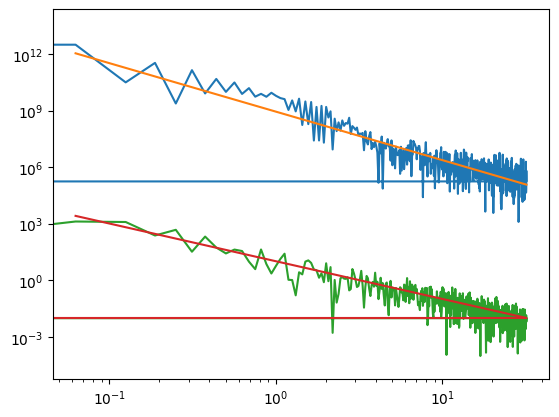

In [242]:
thermal_wf = np.abs(psix)**2 + np.abs(g.gs)**2
norm = np.sum(thermal_wf)*g.dx**2
thermal_wf_norm = g.gpeobj.Natoms* thermal_wf/norm

k_wavf = fft2(np.sqrt(thermal_wf_norm))
curve = np.abs(k_wavf)[0]**2

curve = np.abs(kfunc)[0]**2

grid = g.ki[0][0] 


clean_grid, clean_curve = cleandata(grid, curve)


popt, pcov = curve_fit(fittingfunc, np.log(clean_grid), np.log(clean_curve))

print(popt)

plt.figure() 
plt.plot(g.ki[0][0], curve) 
plt.plot(g.ki[0][0], np.exp(popt[1])*g.ki[0][0]**popt[0])
plt.plot(g.ki[0][0], np.abs(ksamples[0])[0]**2)
plt.plot(g.ki[0][0], 2*g.T/g.ki[0][0]**2, label = 'Theory')
plt.plot()
plt.yscale('log')
plt.xscale('log')

In [252]:
print(100/g.gpeobj.dt)

104857.6


In [253]:
snap = realpropagate(thermal_wf_norm, 10000)

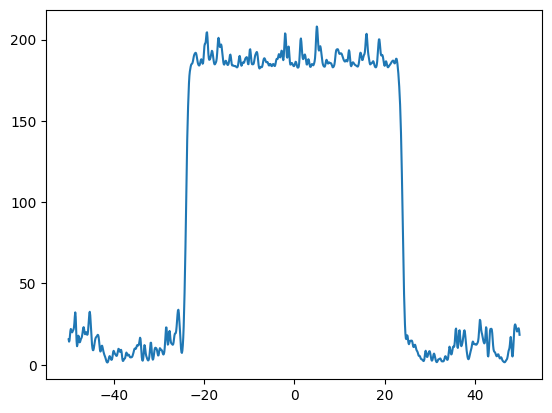

In [115]:
## find the slope of the wavefunction before and after 
plt.figure() 
plt.plot(g.xi[0][0], snap[-1][len(snap[-1])//2])
plt.show() 

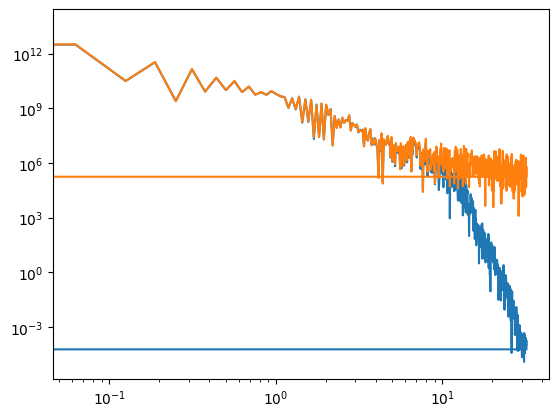

In [130]:
snap0 = fft2(np.sqrt(snap[0][0]))

snap_k = fft2(np.sqrt(snap[-1])) 

plt.figure() 
plt.plot(g.ki[0][0], np.abs(snap_k)[0]**2)
plt.plot(g.ki[0][0], np.abs(snap0)[0]**2)
plt.yscale('log') 
plt.xscale('log')
plt.show() 

Notes: 
- The slope doesn't match - transforming the sum of the ground state + noise from k --> x does not yield a consistent result the other way around?
    - Check the fourier transform stuff... there is probably an issue here somewhere 
- Does the slope stay consistent (even if wrong) over real time propagation?  
- Does the wavefunction stay consistent over a long time real time propagation? 